<a href="https://colab.research.google.com/github/lomovtsevp/non-linear-dynamic-systems/blob/main/Lab_5_PZND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=5>***Ломовцев Павел ИМБО-01-19***



<font size=5>***Практика 5. Эндогенные колебания численности населения в нелинейной демографической
модели***

In [ ]:
import scipy.integrate as integr            
import numpy as np                          
import matplotlib.pyplot as plt

stat_dpi=90
dynamics_pics = (6, 3)
rect_pics = (3, 3)

Численное решение + фазовый портрет

In [ ]:
def plot_solution(y1, y2, time, color1 = "b", color2 = "green"):
    fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)
    plt.plot(time, y1, c = color1, label = "n")
    plt.plot(time, y2, c = color2, label = "k")
    plt.xlabel("time")          
    plt.ylabel("n, k")
    plt.title(f"Численное решение системы эндогенных колебаний")
    plt.legend()
    plt.grid(True)              
    plt.show()

In [ ]:
def plot_phase_portrait(y1, y2, color = "b", starts = None, nulls = None):
    fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
    plt.plot(y1, y2, c = color)
    
    if starts is not None:
        for i in starts:
            plt.scatter(i[0], i[1], c = color)
    if nulls is not None:
        for i in nulls:
            plt.scatter(i[0], i[1], c = color)
    plt.xlabel("n")
    plt.ylabel("k")
    plt.title(f"Фазовый портрет системы эндогенных колебаний")
    plt.grid(True)
    plt.show()

Функция системы эндогенных колебаний

In [ ]:
def endogen(y, t, r=0.015, q=1.2):
  n, k = y
  dn = r * n * (1 - n / k)
  dk = q * n / (n * (q - 1) + 1) - n
  return [dn, dk]

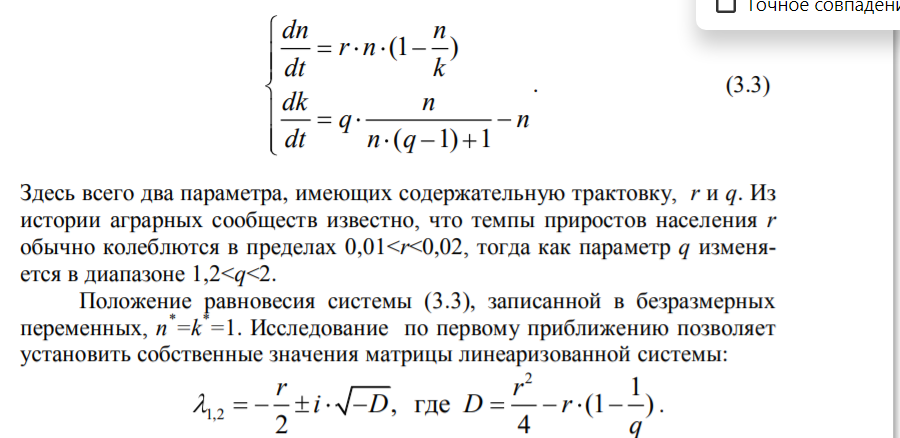

Проведем анализ системы.

In [ ]:
def analyze(f, nulls, starts, time_end = 1000):
    time = np.linspace(0, time_end, 5000)
    for i in starts:
        print(f"В точке {i}")
        w = integr.odeint(f, i, time, ())
        y1 = w[:, 0]
        y2 = w[:, 1]
        
        plot_solution(y1, y2, time)
        plot_phase_portrait(y1, y2, starts = [i], nulls = nulls)

Особые точки: [1, 1].

In [ ]:
starts = [[0.3, 0.3],
          [0.4, 0.4],
          [0.5, 0.5]]

nulls = [[1, 1]]

В точке [0.3, 0.3]


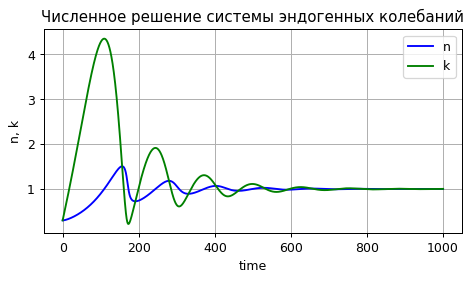

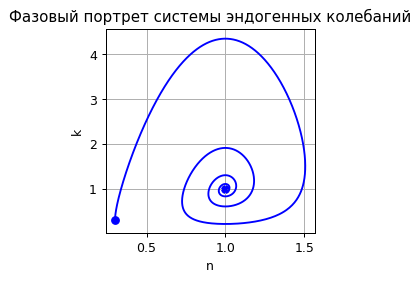

В точке [0.4, 0.4]


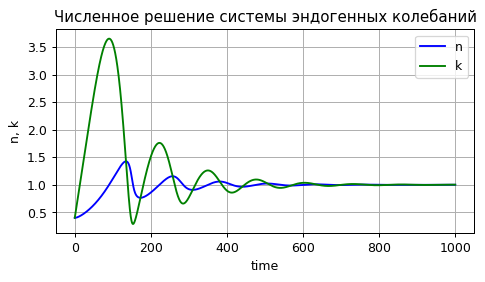

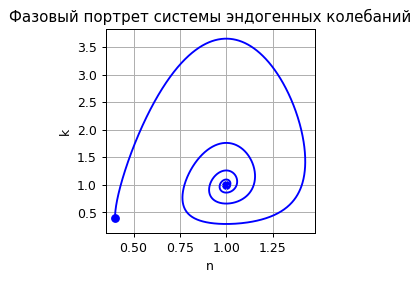

В точке [0.5, 0.5]


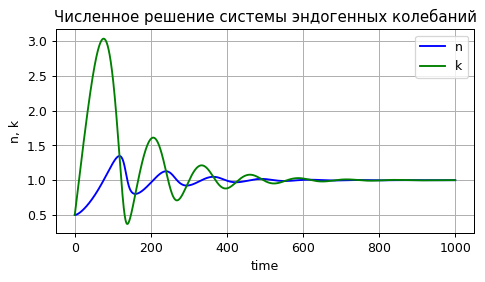

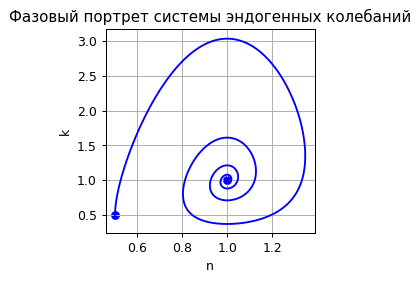

In [ ]:
analyze(endogen, nulls, starts)

<font size=4>***Поскольку собственные числа матрица системы являются комплексными корнями, то тип стационарной точки - ассимптотически устойчивый фокус. Длительность первого цикла - 175 промежутков времени. Второго - 75 временных промежутков. По графику видно, что глубина сокращения численности населения в первый цикл -  почти в два раза. Временной лаг, на который население запаздывает из-за того, что реагирует на сокращение запасов продовольствия примерно равен 20 временным промежуткам.***
***Примечание***: ***При возрастания параметров r и q длина периода растет.***